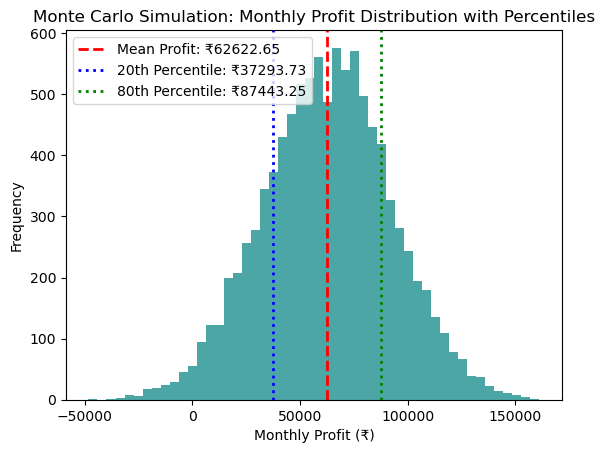

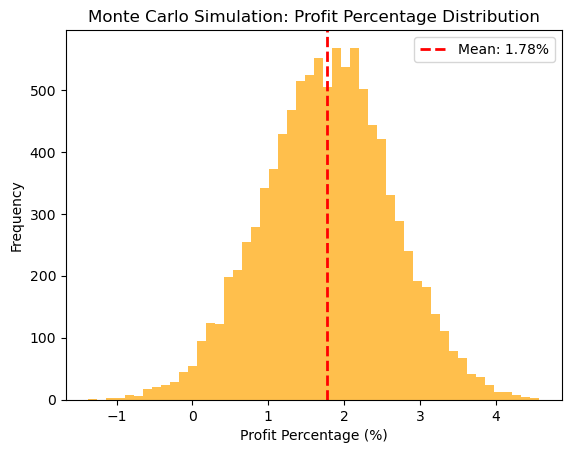

Mean Monthly Profit: ₹62622.65
Standard Deviation of Monthly Profit: ₹29890.46
20th Percentile: ₹37293.73
80th Percentile: ₹87443.25
Probability of Loss in a Month: 1.83%
Mean Profit Percentage: 1.78%
Standard Deviation of Profit Percentage: 0.85%


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Business parameters
selling_price = 25  # Fixed selling price per item (₹)
cost_min, cost_max = 20, 24  # Variable cost range per item (₹)
weekday_avg_customers = 4000  # Average weekday customers
weekend_avg_customers = 5000  # Average weekend customers
customer_stddev = 50  # Variability in daily customers
fixed_daily_cost = 12000  # Fixed daily operational costs (₹)
days_in_month = 30  # Number of days in the month
n_simulations = 10000  # Number of Monte Carlo simulations
monthly_growth_rate = 0.1  # 10% growth applied across the month

# Apply growth factor to customer averages
weekday_avg_customers *= (1 + monthly_growth_rate)
weekend_avg_customers *= (1 + monthly_growth_rate)

# Simulation
monthly_profits = []
monthly_revenues = []

for _ in range(n_simulations):
    monthly_profit = 0  # Initialize monthly profit
    monthly_revenue = 0  # Initialize monthly revenue
    
    for day in range(1, days_in_month + 1):
        # Determine if it's a weekday or weekend
        is_weekend = (day % 7 == 6 or day % 7 == 0)  # Assume day 6, 7, 13, 14... are weekends
        
        # Select appropriate average customer count
        avg_customers = weekend_avg_customers if is_weekend else weekday_avg_customers
        
        # Randomize daily customers and variable cost
        daily_customers = int(np.random.normal(avg_customers, customer_stddev))
        variable_cost = np.random.uniform(cost_min, cost_max)
        
        # Ensure non-negative customer count
        daily_customers = max(0, daily_customers)
        
        # Calculate daily revenue and cost
        daily_revenue = daily_customers * selling_price
        daily_cost = daily_customers * variable_cost + fixed_daily_cost
        
        # Calculate daily profit
        daily_profit = daily_revenue - daily_cost
        monthly_profit += daily_profit  # Accumulate monthly profit
        monthly_revenue += daily_revenue  # Accumulate monthly revenue
    
    monthly_profits.append(monthly_profit)
    monthly_revenues.append(monthly_revenue)

# Calculate profit percentages
profit_percentages = [(profit / revenue) * 100 if revenue > 0 else 0 for profit, revenue in zip(monthly_profits, monthly_revenues)]

# Results analysis
mean_monthly_profit = np.mean(monthly_profits)
stddev_monthly_profit = np.std(monthly_profits)
mean_profit_percentage = np.mean(profit_percentages)
percentile_20 = np.percentile(monthly_profits, 20)
percentile_80 = np.percentile(monthly_profits, 80)
probability_loss = np.mean(np.array(monthly_profits) < 0)

# Plot profit distribution
plt.hist(monthly_profits, bins=50, color='teal', alpha=0.7)
plt.title("Monte Carlo Simulation: Monthly Profit Distribution with Percentiles")
plt.xlabel("Monthly Profit (₹)")
plt.ylabel("Frequency")
plt.axvline(mean_monthly_profit, color='red', linestyle='dashed', linewidth=2, label=f"Mean Profit: ₹{mean_monthly_profit:.2f}")
plt.axvline(percentile_20, color='blue', linestyle='dotted', linewidth=2, label=f"20th Percentile: ₹{percentile_20:.2f}")
plt.axvline(percentile_80, color='green', linestyle='dotted', linewidth=2, label=f"80th Percentile: ₹{percentile_80:.2f}")
plt.legend()
plt.show()

# Plot profit percentage distribution
plt.hist(profit_percentages, bins=50, color='orange', alpha=0.7)
plt.title("Monte Carlo Simulation: Profit Percentage Distribution")
plt.xlabel("Profit Percentage (%)")
plt.ylabel("Frequency")
plt.axvline(np.mean(profit_percentages), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {np.mean(profit_percentages):.2f}%")
plt.legend()
plt.show()

# Results analysis
mean_profit_percentage = np.mean(profit_percentages)
stddev_profit_percentage = np.std(profit_percentages)

# Print summary
print(f"Mean Monthly Profit: ₹{mean_monthly_profit:.2f}")
print(f"Standard Deviation of Monthly Profit: ₹{stddev_monthly_profit:.2f}")
print(f"20th Percentile: ₹{percentile_20:.2f}")
print(f"80th Percentile: ₹{percentile_80:.2f}")
print(f"Probability of Loss in a Month: {probability_loss:.2%}")
print(f"Mean Profit Percentage: {mean_profit_percentage:.2f}%")
print(f"Standard Deviation of Profit Percentage: {stddev_profit_percentage:.2f}%")
